In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [3]:
#import the csv file , show the head of data
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore data 

In [4]:
# we are going to explore the data
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.shape

(284807, 31)

As shown the data is too big for modeling (284807 rows), that mean we take a sample of it to be ready for model and try it ..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No Null value

In [8]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

As shown the mean in class very close to (0), that show that must of data have value (0) 


# Sampling the data

In [9]:
#now we sample data, we take 10 percent of data and save it in df2
df2=df.sample(frac=0.1,random_state=1)


In [10]:
df2.shape

(28481, 31)

# EDA

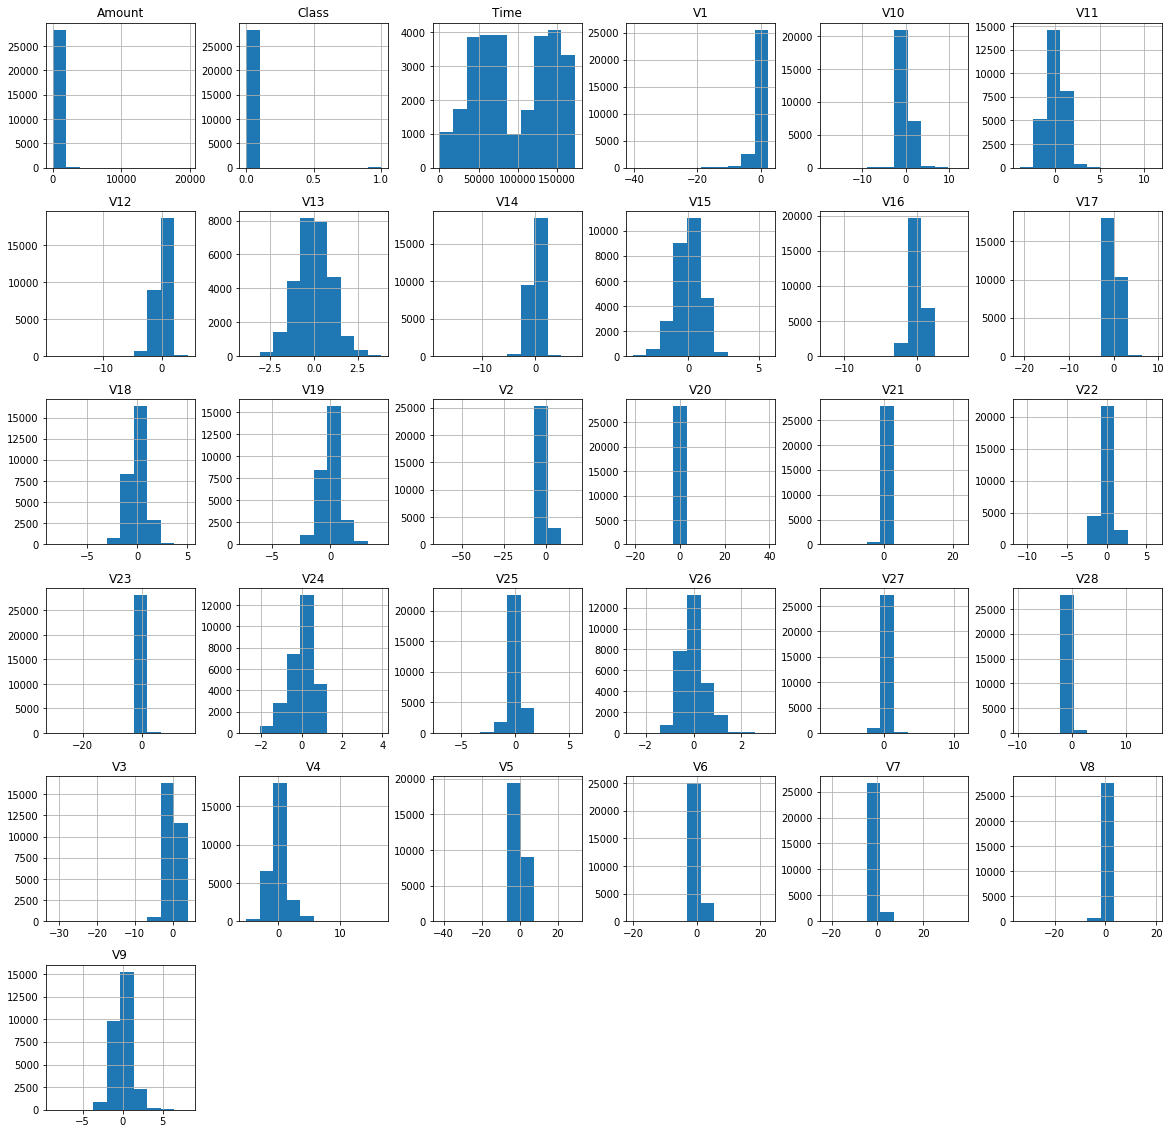

In [11]:
# we create a histogram for whole data to explore it
df2.hist(figsize=(20,20))
plt.show()

As shown all values in all columns is concentrated around the 0 value ,resulted the value of class if also has most values =0, which mean a normal case of taransaction , more clear in next figure

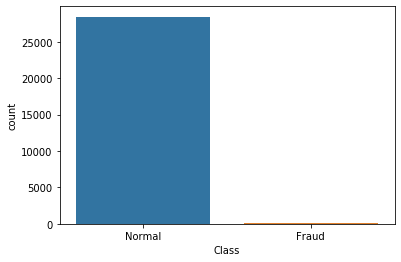

In [29]:
sns.countplot(x="Class",data=df2)
plt.xticks(range(2),["Normal","Fraud"])
plt.show()

In [13]:
# we divide the class in 2 dataframe on with fraud values and the other with normal values
fraud= df2[df2["Class"]==1]
normal= df2[df2["Class"]==0]
print("The number of Fraud cases : {}".format(len(fraud)))
print("The number of Normal cases : {}".format(len(normal)))


The number of Fraud cases : 49
The number of Normal cases : 28432


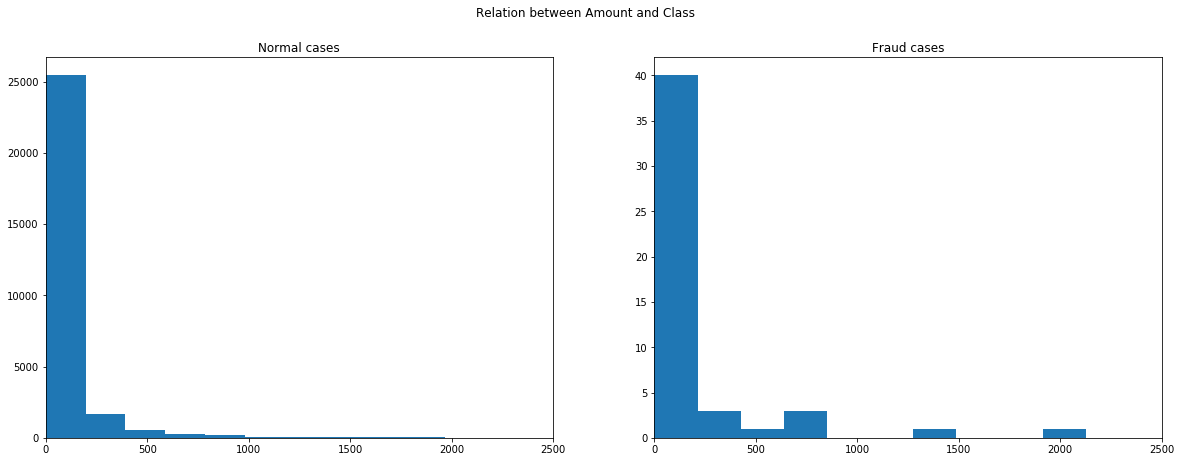

In [14]:
# now we can find if there any relation between the Amount and Time with fraud and normal
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7),sharex=True)
fig.suptitle("Relation between Amount and Class")
ax1.hist(normal["Amount"],bins=100)
ax1.set_title("Normal cases")
ax2.hist(fraud["Amount"],bins=10)
ax2.set_title("Fraud cases")
plt.xlim(0,2500)
plt.show()


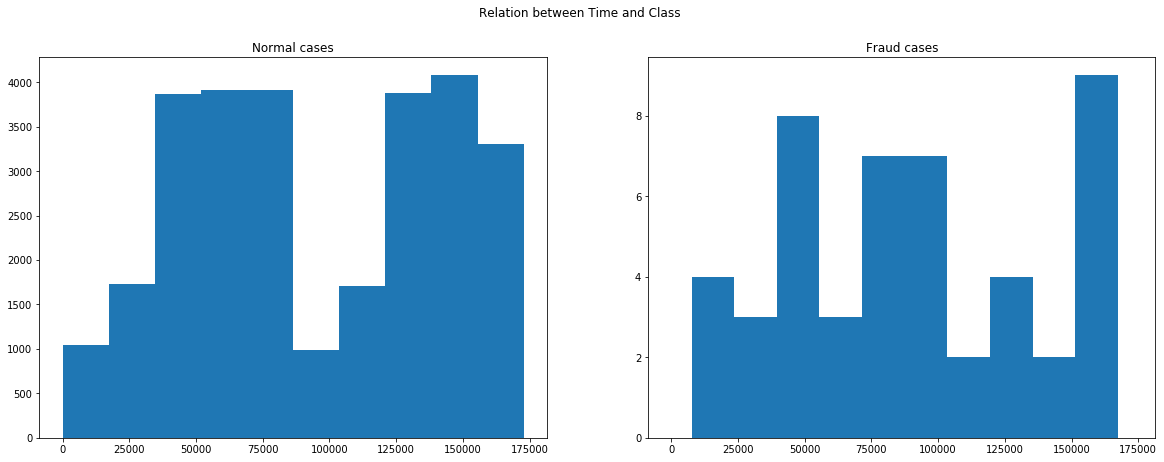

In [54]:
# now we can find if there any relation between the time and Time with fraud and normal
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7),sharex=True)
fig.suptitle("Relation between Time and Class")
ax1.hist(normal["Time"],bins=10)
ax1.set_title("Normal cases")
ax2.hist(fraud["Time"],bins=10)
ax2.set_title("Fraud cases")
plt.show()

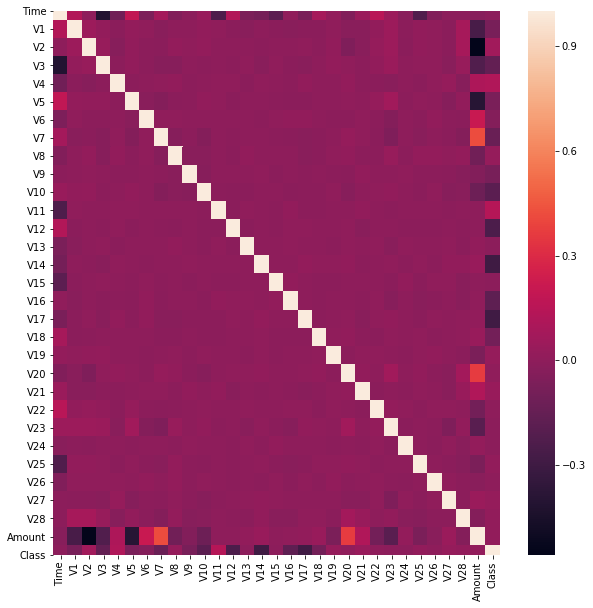

In [60]:
# Heatmap to find the correlation between columns in df2
df2_corr=df2.corr()
fig=plt.figure(figsize=(10,10))
sns.heatmap(df2_corr)
plt.show()

Most the correlation between columns around 0 ,there is no too much strong correlatin between features with each other and with Class column

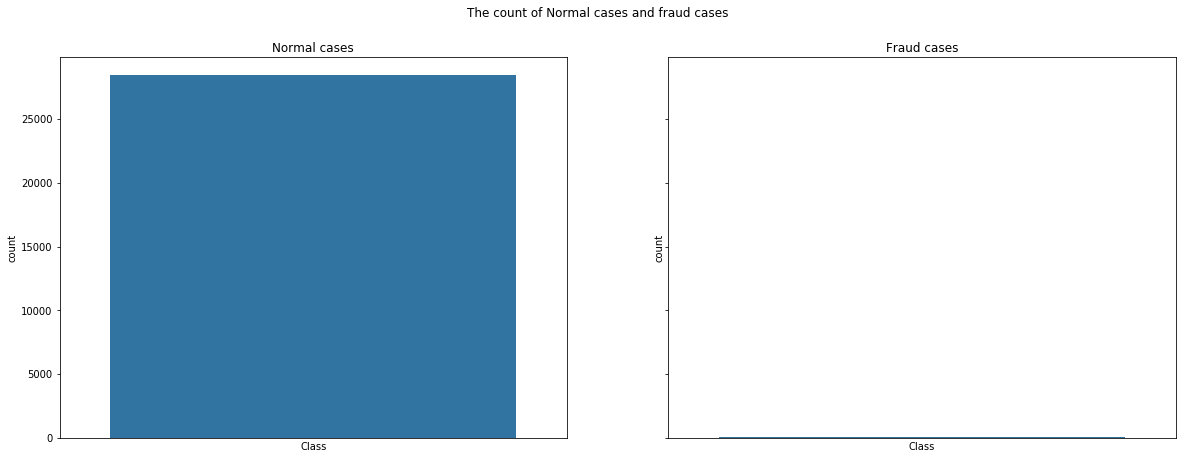

The number of Fraud cases : 49
The number of Normal cases : 28432


In [36]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7),sharex=True,sharey=True)
fig.suptitle("The count of Normal cases and fraud cases ")
sns.countplot(normal["Class"],ax=ax1)
ax1.set_title("Normal cases")
sns.countplot(fraud["Class"],ax=ax2)
ax2.set_title("Fraud cases")
plt.xticks(range(0))
plt.show()
print("The number of Fraud cases : {}".format(len(fraud)))
print("The number of Normal cases : {}".format(len(normal)))

As shown there is a big difference in no. of cases betweem Normal and Fraud cases which can affect on modeling ,
so we need to do oversamplig for fraud values or undersampling for normal values or using smote techinque, bec. the model will be biased to class 0 (normal cases) if we dont solve the imbalanced data

# SMOTETOMEK


#We are working on imbalance data using SMOTE TOMEK techique ,appling it on whole data before sampling to avoid missing values in sample data, first we have to divide data into x and y 

In [38]:
x=df.drop(["Class"],axis=1).values
y=df["Class"].values

In [40]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [43]:
#smotetomek use both techinique , smote for oversampling and tomek for undersampling
from imblearn.combine import SMOTETomek

In [42]:
pip install imblearn

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.


In [45]:
smk = SMOTETomek(random_state=39)
x_sm,y_sm=smk.fit_sample(x,y)

In [46]:
x_sm.shape,y_sm.shape

((567560, 30), (567560,))

In [53]:
from collections import Counter
print("the orignal data is : {}".format(Counter(y)))
print("the New data is {}".format(Counter(y_sm)))

the orignal data is : Counter({0: 284315, 1: 492})
the New data is Counter({0: 283780, 1: 283780})


In [50]:
pip install collections

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
